# CENSUS INCOME PROJECT 

## DATA COLLECTION 

In [1]:
#import bascic library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data and printing some top rows
df=pd.read_csv('data.csv')
df.head(12)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [3]:
#displaying some bottom rows
df.tail(8)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32552,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32553,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32554,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


We can see that the DEPENDENT VARIABLE "INCOME" is categorical type,

> So we can say its a Classification Logistic type as we have only 2 categories.



# EXPLORATORY DATA ANALYSIS

In [4]:
#displaying the column names 
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

We can see that 'Income' is **DEPENDENT VARIABLE** and all other ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num','Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex','Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country'] are **INDEPENDENT VARIABLE** 

In [5]:
#displaying the number of rows and columns
df.shape

(32560, 15)

We have 32560 rows and 15 columns

In [6]:
#checking the data type of all the varialbe
data_type=df.dtypes
data_type

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

We can see that we have integer type and object type and no float type
All variable with object type has to be converted into numerical type before model building 

In [7]:
#Count how many number of data type is present
data_type.value_counts()

object    9
int64     6
dtype: int64

There are 9 variable with object type and 6 variable with integer type

In [8]:
#displaying the all the information about the variables 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We can see the most of the information from the above column like how many data types is present and how mant records are there and is there any null values or not and mich more

In [9]:
#checking for null values 
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

We can see that there are no null values but I can across some special character when i was going through my excel sheet 

In [10]:
#Displaying the maximum and minimum of the numerical type variable
for i in df.columns:
  if df[i].dtype !='object':
    print(f"===== Column: {i} =====")
    print(f"MAX: {df[i].max()} ")
    print(f"MIN: {df[i].min()} ")
    print(f"Number of unique value: {df[i].nunique()} \n\n\n")

===== Column: Age =====
MAX: 90 
MIN: 17 
Number of unique value: 73 



===== Column: Fnlwgt =====
MAX: 1484705 
MIN: 12285 
Number of unique value: 21647 



===== Column: Education_num =====
MAX: 16 
MIN: 1 
Number of unique value: 16 



===== Column: Capital_gain =====
MAX: 99999 
MIN: 0 
Number of unique value: 119 



===== Column: Capital_loss =====
MAX: 4356 
MIN: 0 
Number of unique value: 92 



===== Column: Hours_per_week =====
MAX: 99 
MIN: 1 
Number of unique value: 94 





WE can see that the numerical data are continious and descrete type.

In [11]:
#dispalying the number of unique element of the categorical type and there ferquency
for i in df.columns:
  if df[i].dtype == 'object':
    print(f'===== column: {i} =====')
    print(f'The number of unique element in {i} is ',df[i].nunique())
    print(df[i].value_counts())
    print('\n\n\n')

===== column: Workclass =====
The number of unique element in Workclass is  9
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64




===== column: Education =====
The number of unique element in Education is  16
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64




===== column: Marital_status =====
The number of unique element in Marital_status is  7
 Married-civ-spouse       14976
 Never-married            10682
 Divorced   

We can see that the column 'Workclass', 'Occupation ', 'Native_country ' has special character ? 
So, we need to remove/replace this before model building 
and we can see that in DEPENDENT VARIALBLE class imbalance is seen  

In [12]:
#looking at the statistical information of the Numerical type
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0



> We can see that the Means and 50% almost same in some column and also huge difference between Skewness and outlier are present


> Also Range ( max - min ) is low in some and very high in some other

> Difference between (Max and 75%) and (Min and 25) is low in some and high in some other  


In [13]:
#looking at the statistical information of the Categorical type
df.describe(include='object').T

,count,unique,top,freq
Workclass,32560,9,Private,22696
Education,32560,16,HS-grad,10501
Marital_status,32560,7,Married-civ-spouse,14976
Occupation,32560,15,Prof-specialty,4140
Relationship,32560,6,Husband,13193
Race,32560,5,White,27815
Sex,32560,2,Male,21789
Native_country,32560,42,United-States,29169
Income,32560,2,<=50K,24719


We can see the Median of the each column with its frequency and also number of unique values present

# Univariate analysis


In [14]:
#Storing the numerical column in numeric_col and cat col in cat_col
numeric_col=[]
cat_col=[]
for i in df.columns:
  if df[i].dtype != 'object':
    numeric_col.append(i)
  else:
    cat_col.append(i)

Storing the numerical and object column separately 

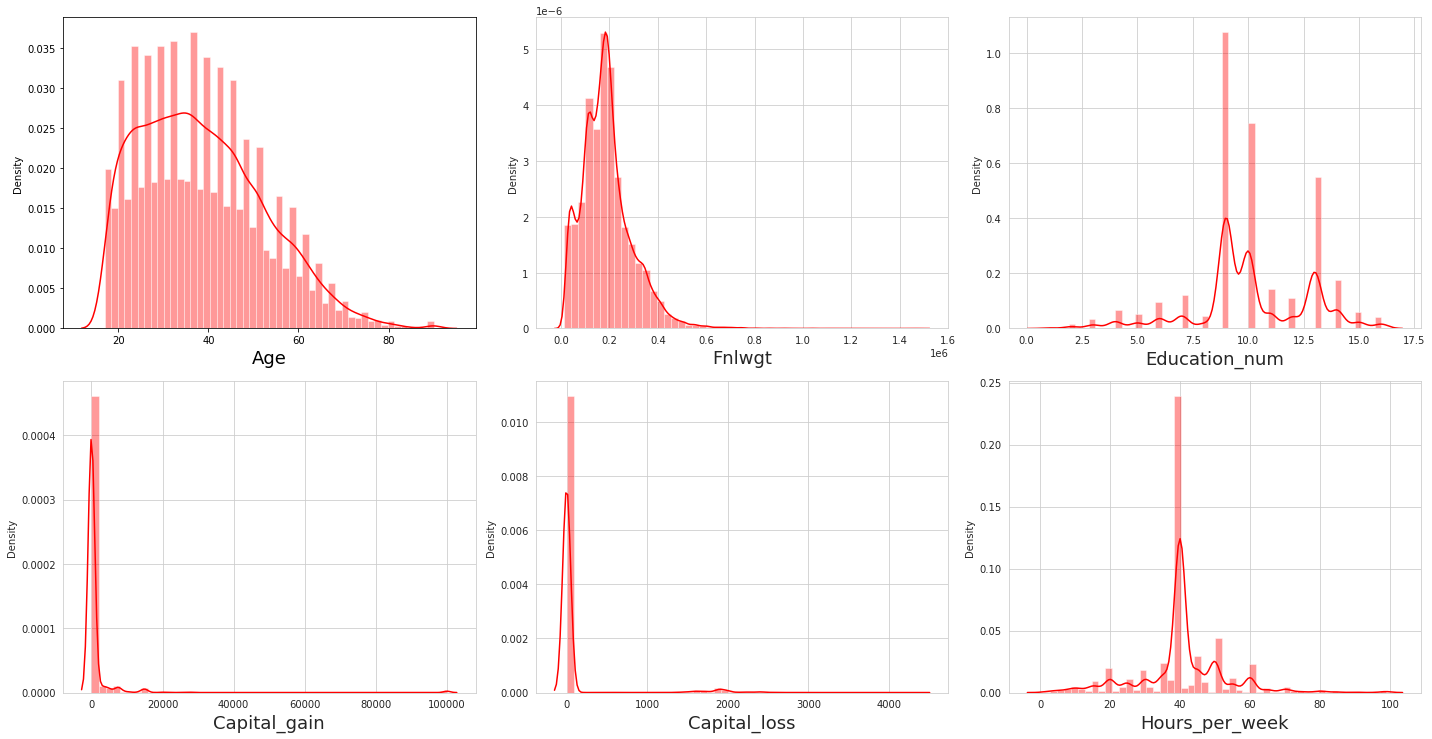

In [15]:
#plotting box plot for numerical column
plt.figure(figsize=(20,25))
for i,col in enumerate(numeric_col):
    plt.subplot(5,3,i+1)
    sn.set_style('whitegrid')
    sn.distplot(df[col],color='red')
    plt.xlabel(col, fontsize=18)
    plt.tight_layout()

We can see that the skewness is present in present in almost all columns

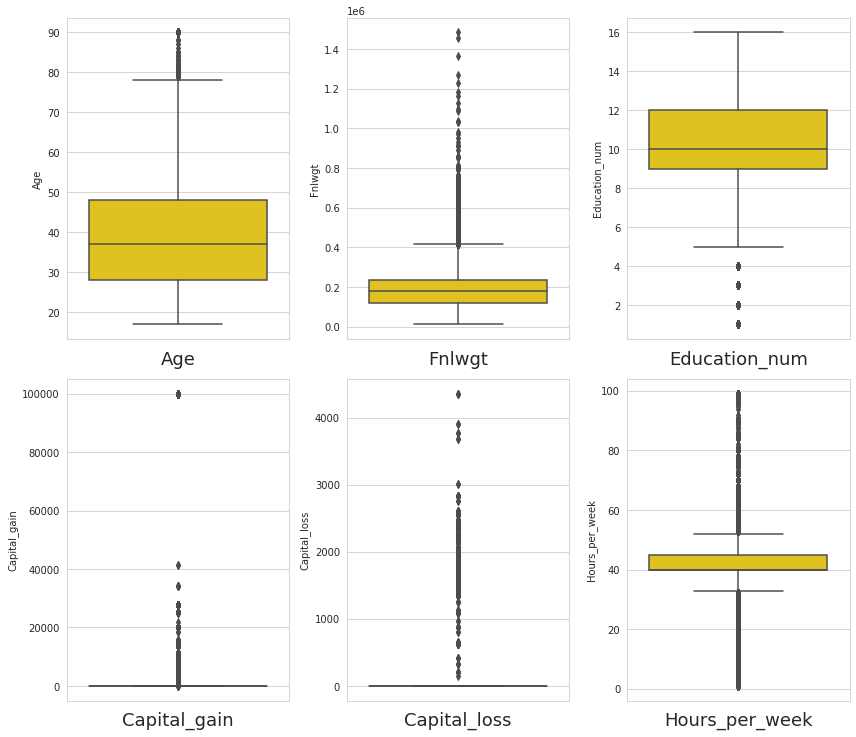

In [16]:
#ploting boxplot for the numerical column
plt.figure(figsize=(12,25))
for i,col in enumerate(numeric_col):
    plt.subplot(5,3,i+1)
    sn.set_style('whitegrid')
    sn.boxplot(y=col,data=df,color='gold')
    plt.xlabel(col, fontsize=18)
    plt.tight_layout()

We can see lot of outlier is present and we should treat before modle building

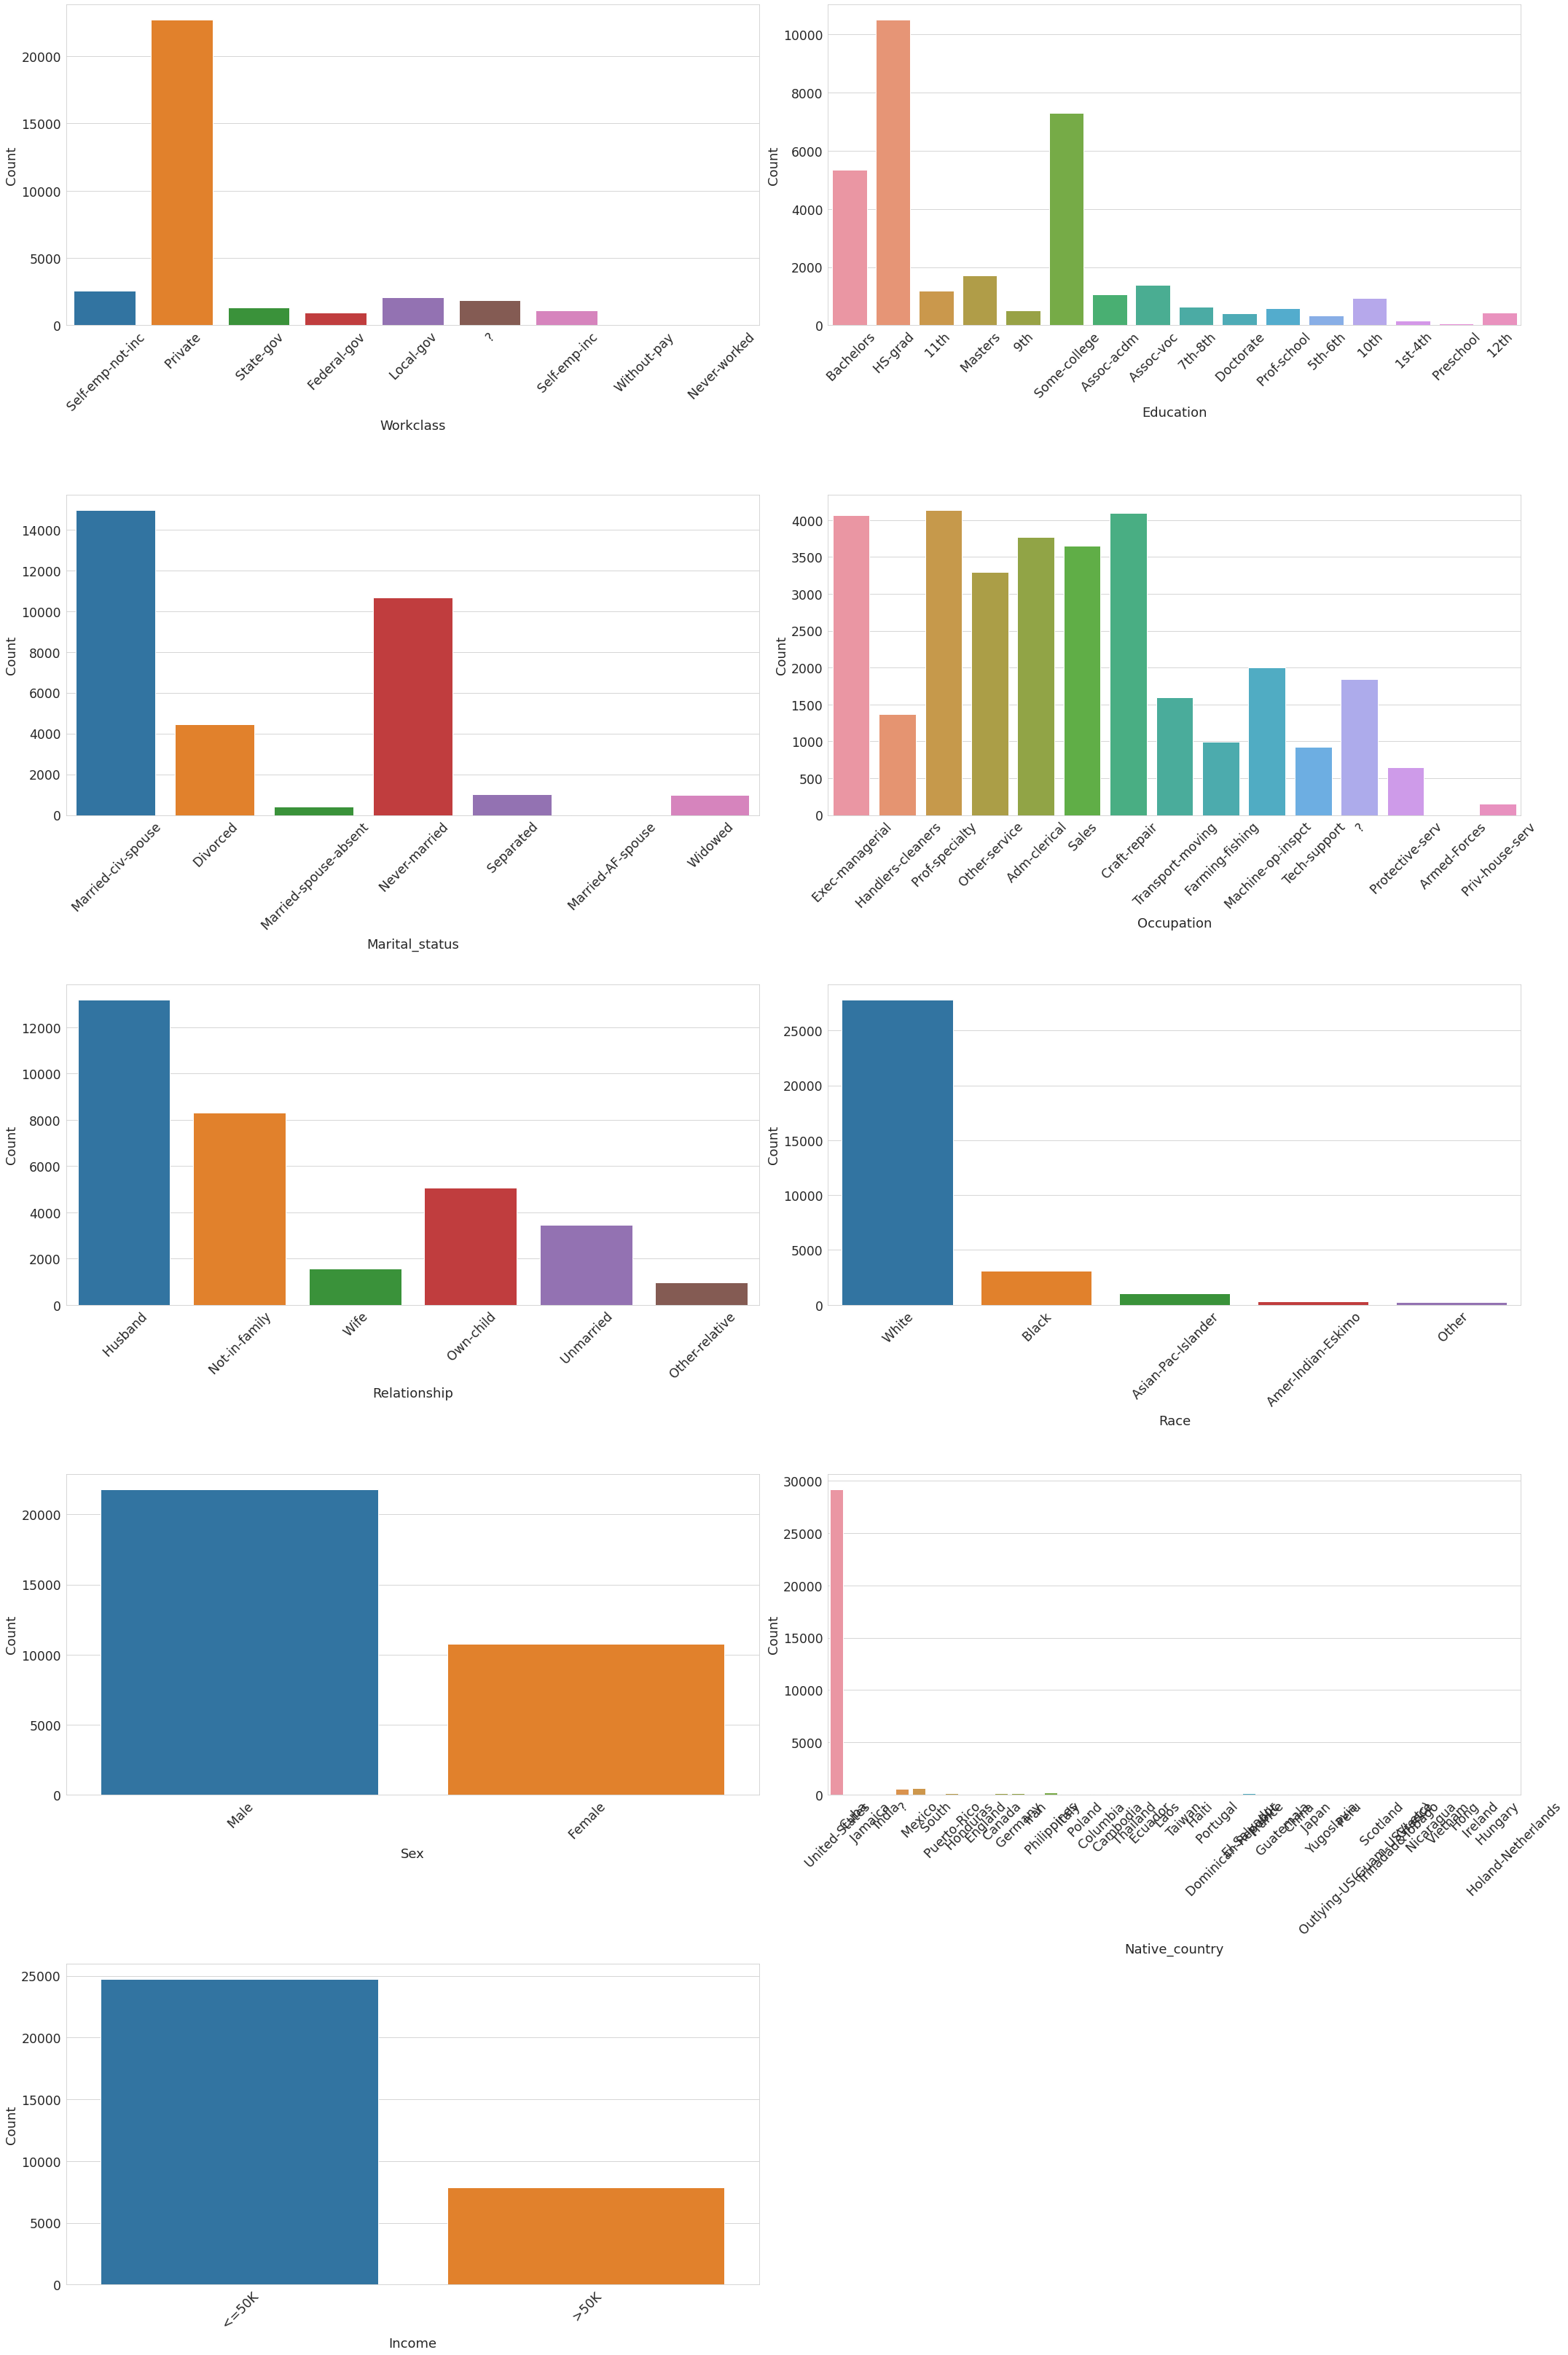

In [17]:
#ploting the count plot for the numerical column
plt.figure(figsize=(30,45))
for i,col in enumerate(cat_col):
    plt.subplot(5,2,i+1)
    sn.countplot(x=col,data=df)
    plt.xticks(rotation=45,size='xx-large')
    plt.yticks(size='xx-large')
    plt.ylabel('Count', fontsize=18)
    plt.xlabel(col, fontsize=18)
    plt.tight_layout()

We can see that the count of each class

> We can see that workclass private is more in the in our data set 

> Male count is more in sex than female

> White people are more in Race

> Native column is not visible correctly So lets plot it agian






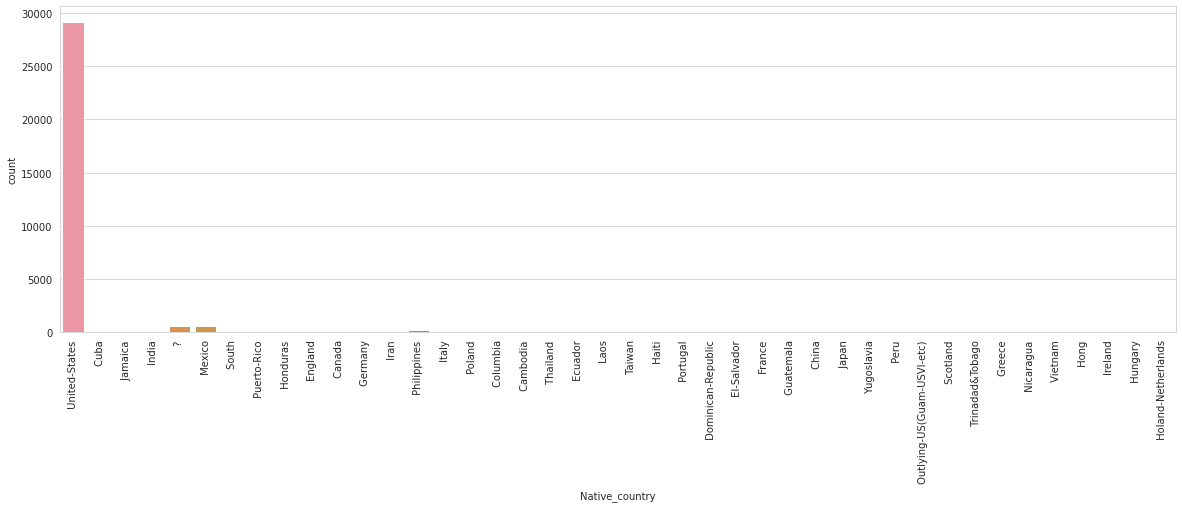

In [18]:
plt.figure(figsize=(20,6))
sn.countplot(df['Native_country'])
plt.xticks(rotation=90);

We can see that the United-State is more and all other is less than the 500 hundred

> WE CAN see that the less than or equal 50k is more 50k is less than that of people 



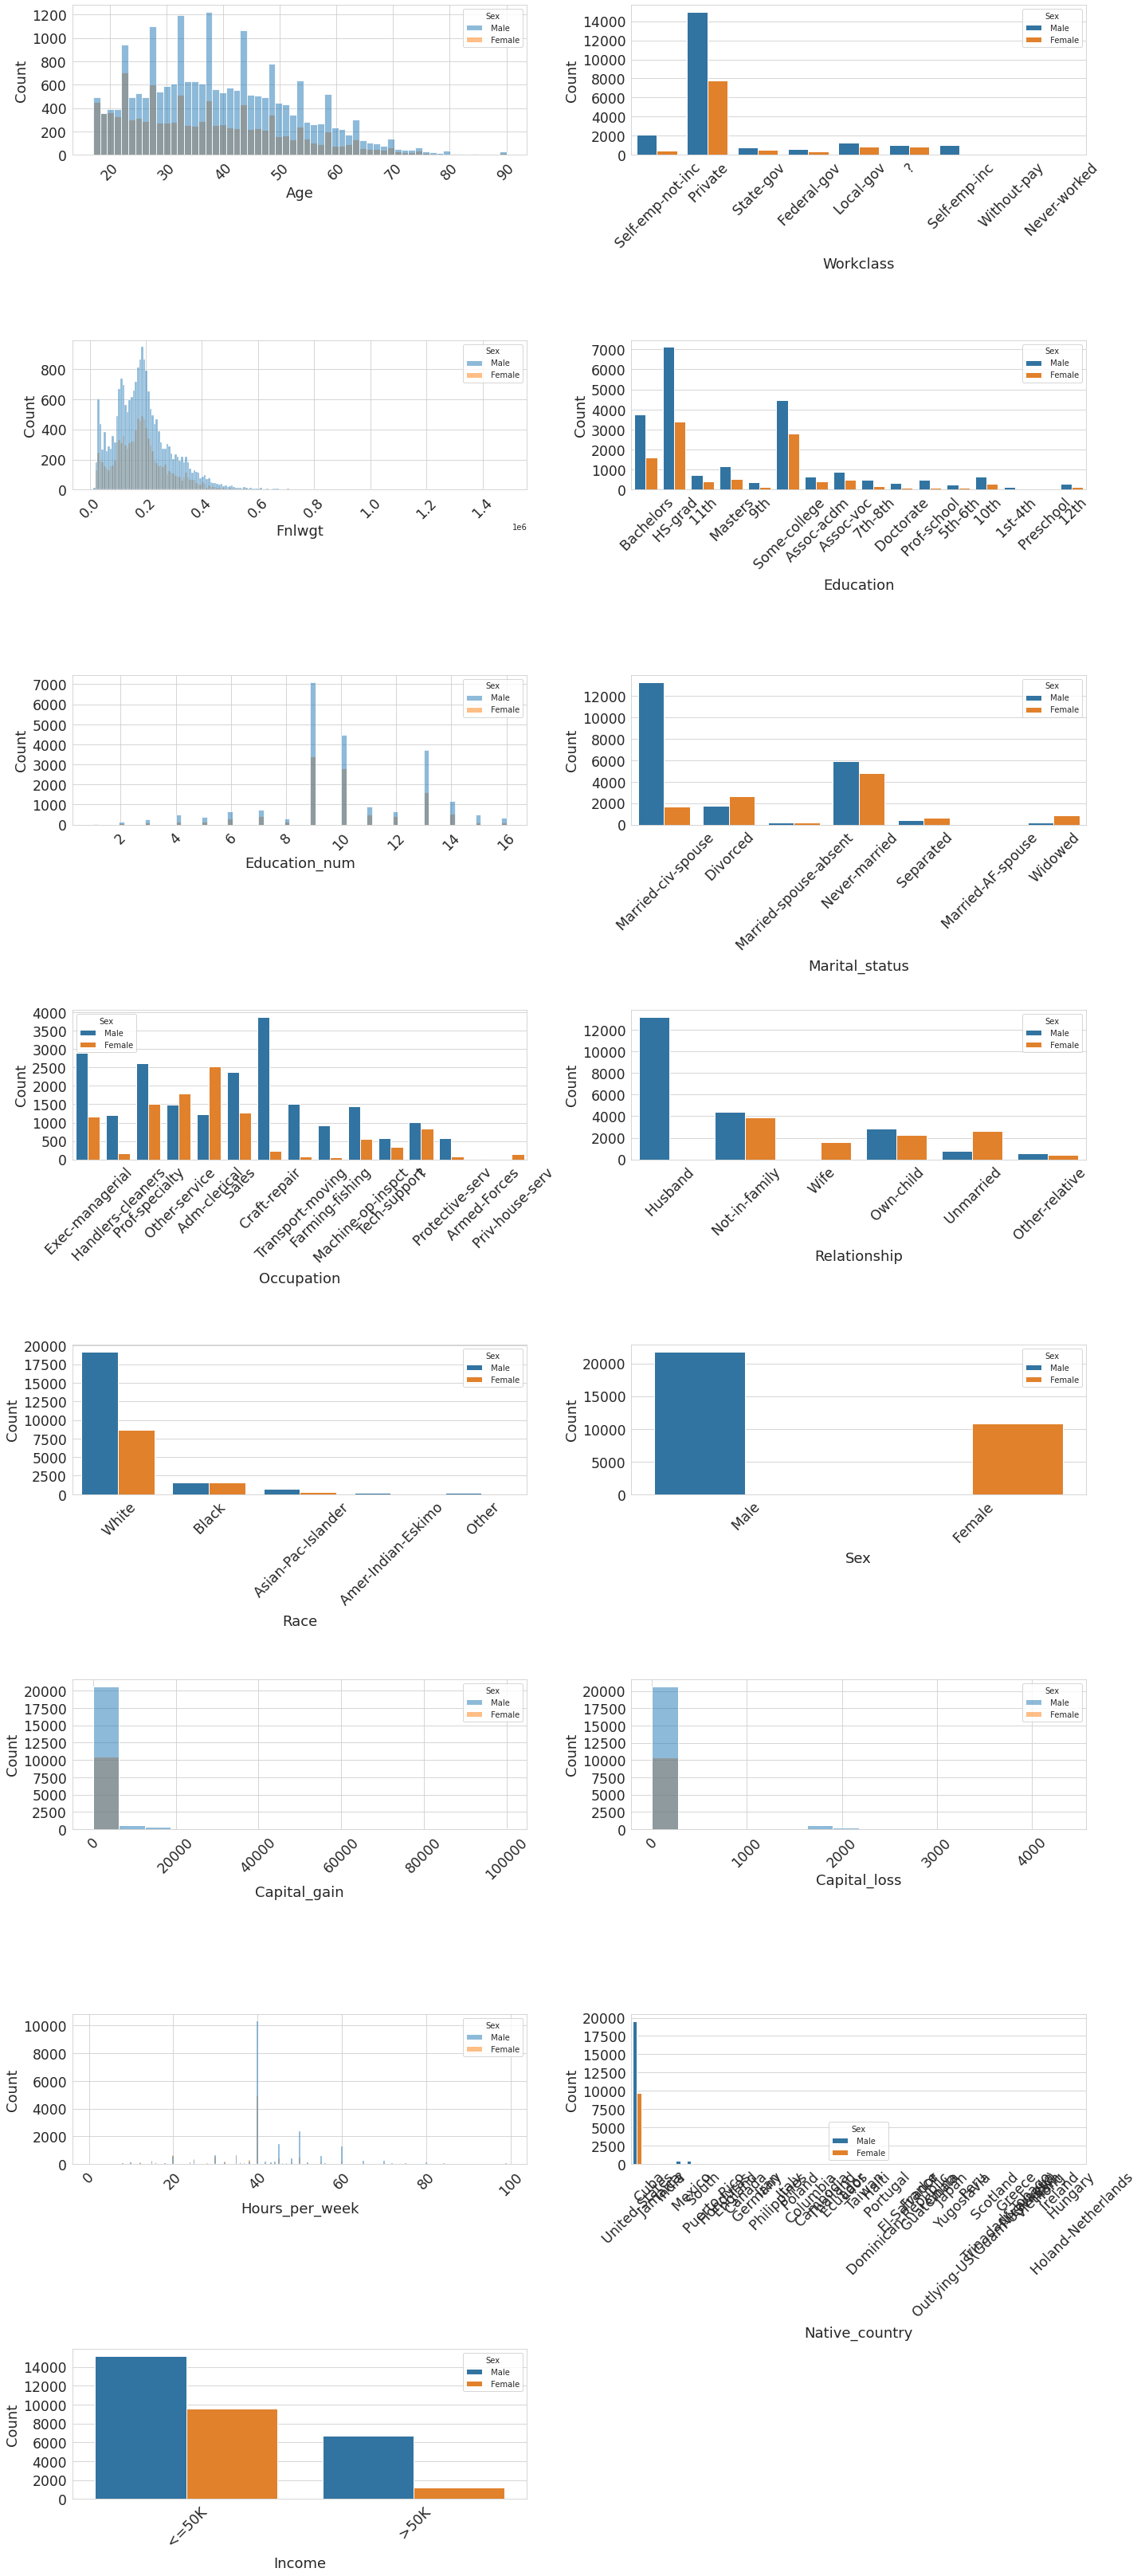

In [19]:
plt.figure(figsize=(20,45))
for i,col in enumerate(df.columns):
  plt.subplot(8,2,i+1)
  if df[col].dtype == 'object':
    sn.countplot(x=col,hue='Sex',data=df)
    plt.xticks(rotation=45,size='xx-large')
    plt.yticks(size='xx-large')
    plt.ylabel('Count', fontsize=18)
    plt.xlabel(col, fontsize=18)
    plt.tight_layout()
  else:
    sn.histplot(x=col,hue='Sex',data=df)
    plt.xticks(rotation=45,size='xx-large')
    plt.yticks(size='xx-large')
    plt.ylabel('Count', fontsize=18)
    plt.xlabel(col, fontsize=18)
    plt.tight_layout()

We can see that the male is dominating and Also Age from 20 to 50 is more also EDucation_num(Education year) is mostly 9 Years

# Bivariate analysis

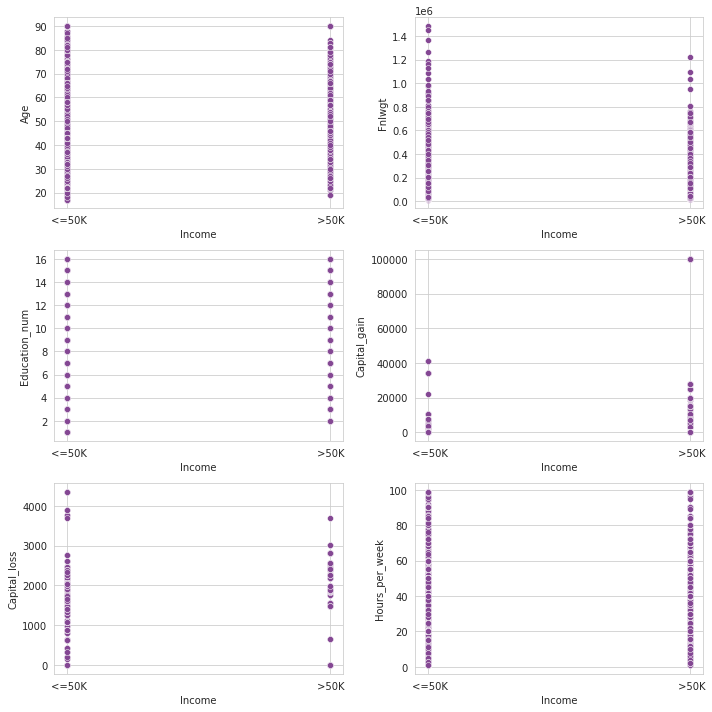

In [20]:
#plotting the scatter plot for the numerical vriable with the Dependent Variable
plt.figure(figsize=(10,10))
for i,col in enumerate(numeric_col):
  sn.set_palette('PRGn')
  plt.subplot(3,2,i+1)
  sn.scatterplot(x='Income',y=col,data=df)
  plt.tight_layout()

We can see that for each variable person making more than 50k and less than 50k is scatter through out the scale, means For example take AGE people 20 to 90 is making both more than 50k and less than 50k

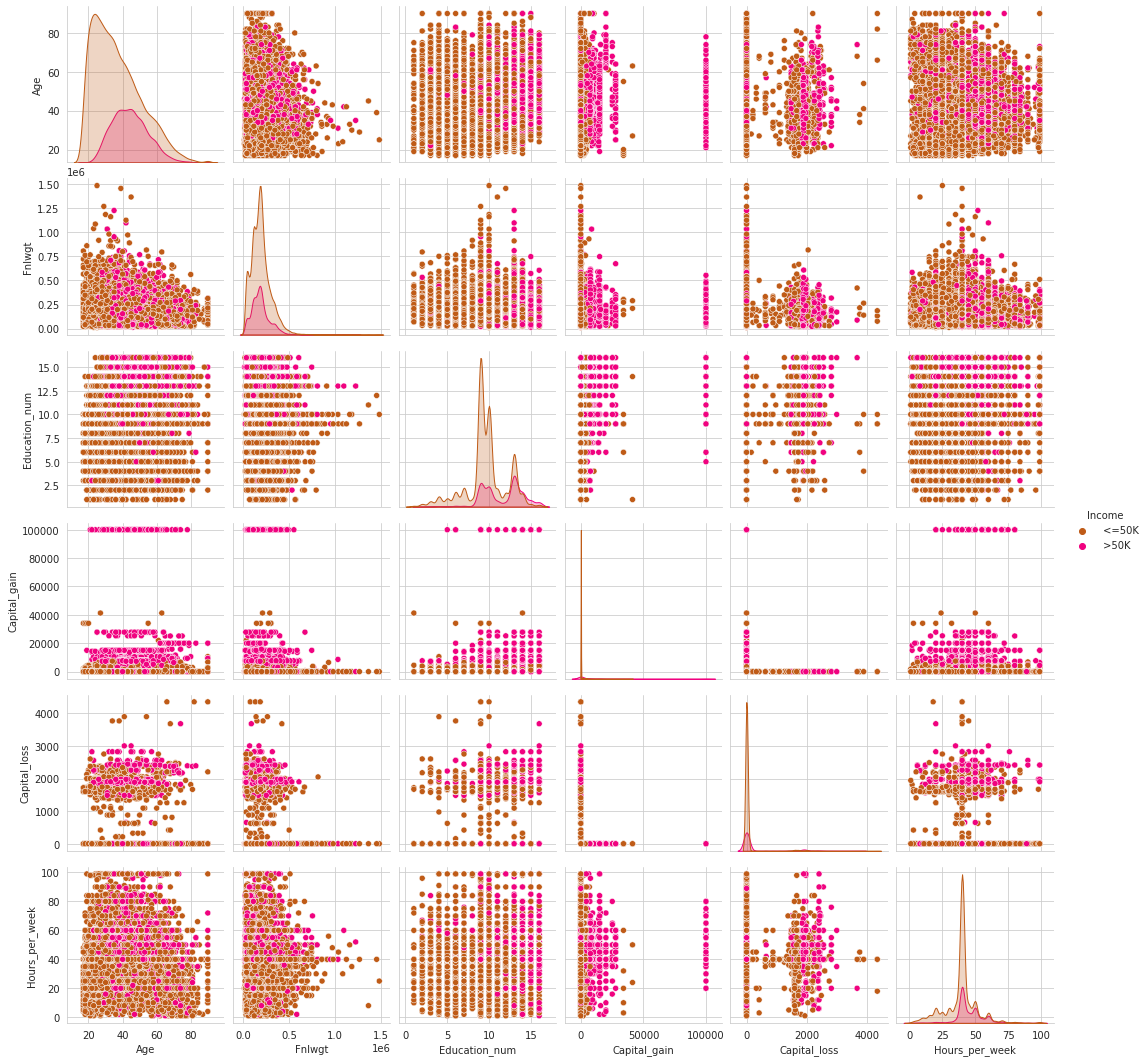

In [21]:
#plotting the pair plot to our data
sn.set_palette('Accent_r')
sn.pairplot(df,hue='Income')


We can see that the two cluster <=50k and >50k is overlaping and we cannot separate them easily 

# Multi variate analysis

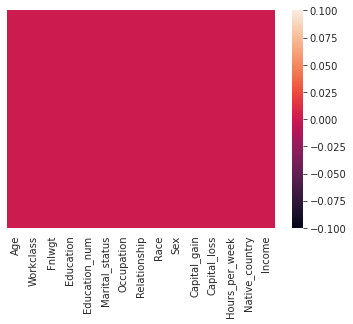

In [22]:
#plotting heat map to see wheather null value is present or not
sn.heatmap(df.isnull(),yticklabels=False,Cmap='icefire');

We can see that there is no null value but there are some special character present in our data sey

In [23]:
#lets see the correlation of each parameter with the label variable 
dfcor=df.corr()
dfcor

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


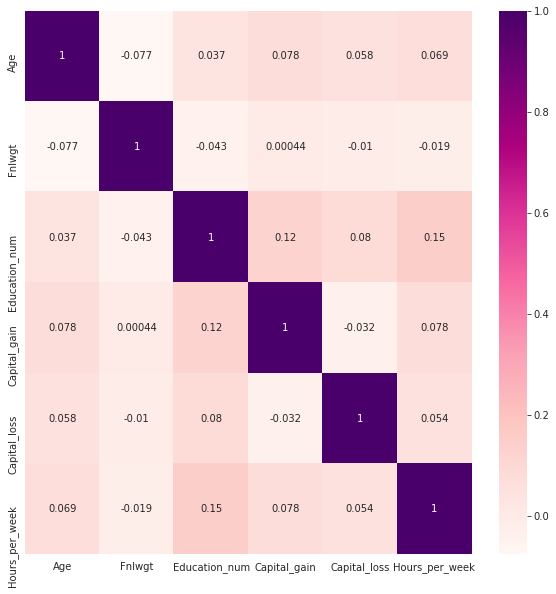

In [24]:
#Lets plot the above table in heat map 
plt.figure(figsize=(10,10))
sn.heatmap(dfcor,annot=True,cmap='RdPu');

We can see that the not so good with each other and here we are only seeing the corelation between the numerical varialbe 

# Data cleaning 

In [25]:
#replacing the "?" by nan value
df.replace(' ?',np.nan,inplace=True)

In [26]:
#Now seeing how many null value is present 
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

We can see that the Workcalss has 1836, Occupation has 1843 and Native country have 583 missing value

In [27]:
#droping the column 'Marital_status"
df.drop('Marital_status',axis=1,inplace=True)

I am droping the Marital_status has it is giving the same information with respect to column Relationship

In [28]:
#Filling the missig values 
df['Workclass'].fillna(df['Workclass'].mode()[0],inplace=True)
df['Occupation'].fillna(df['Occupation'].mode()[0],inplace=True)
df['Native_country'].fillna(df['Native_country'].mode()[0],inplace=True)

I have Filled my Missing values by Mode as they were categorical column

In [29]:
#replacing dependent variable by 0 and 1
df['Income']=df['Income'].apply(lambda x:0 if x==' <=50K' else 1)
df['Income'].value_counts()

0    24719
1     7841
Name: Income, dtype: int64

Converting Dependent variable into Numerical column 0 means person making less than 50k and 1 means more than 50k

In [30]:
#Encoding method 
df['Relationship'].replace([' Husband',' Wife'],1,inplace=True)
df['Relationship'].replace(' Unmarried',0,inplace=True)
df['Relationship'].replace([' Not-in-family',' Own-child',' Other-relative'],2,inplace=True)

Here I have encoded Ordinal column by rank  

In [31]:
#Encoding method and reducing the class in Education column
df['Education'].replace(' Doctorate',5,inplace=True)
df['Education'].replace(' Masters',4,inplace=True)
df['Education'].replace(' Bachelors',3,inplace=True)
df['Education'].replace([' HS-grad',' Some-college',' Assoc-acdm',' Assoc-voc',' Prof-school',
                         ' 12th'],2,inplace=True)
df['Education'].replace([' 9th',' 7th-8th',' 5th-6th',' 10th',' 1st-4th',' 11th',' Preschool'],1,inplace=True)

Here I have encoded Ordinal column by rank 

In [32]:
#using Label encoder 
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Workclass']=LE.fit_transform(df['Workclass'])
df['Occupation']=LE.fit_transform(df['Occupation'])
df['Native_country']=LE.fit_transform(df['Native_country'])
df['Race']=LE.fit_transform(df['Race'])
df['Sex']=LE.fit_transform(df['Sex'])

I have coverted column 'Workclass', 'Occupation', 'Native_country', 'Race Sex' by numeric value by label encoder

In [33]:
#Making a copy of my data set in order not to lose the data
dfdrop=df.copy()

In [34]:
#checking wheather I can remove outlier or not by z score method
from scipy.stats import zscore
z=np.abs(zscore(dfdrop))
dfdrop=dfdrop[(z<3).all(axis=1)]
print("Before removing outliers:",df.shape)
print("After removing outliers:",dfdrop.shape)
p=100-(len(dfdrop.index)/len(df.index)*100)
print(f'We are lossing {p} % of data.')

Before removing outliers: (32560, 14)
After removing outliers: (27488, 14)
We are lossing 15.577395577395578 % of data.


We can see that we are loosing more than 15% of data so lets not remove the outlire

In [35]:
#Splittinf the dependent and independent variable separately
x=df.drop('Income',axis=1)
y=df['Income']

In [36]:
#removing the skewness in our data set by power transform
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [37]:
#scaling our data set 
from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit_transform(x)

In [38]:
#apply over sampling to handel class imbalance in our dependent variable
from imblearn.over_sampling import SMOTE
ovs=SMOTE()
x_over,y_over=ovs.fit_resample(x,y)
print(x_over.shape,'\n')
print(y_over.shape)

(49438, 13) 

(49438,)


# Building the modle

## Selecting the best random variable

In [39]:
#Selecting the best random state
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier

acc=0
ran=0
for i in range(1,100):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
  mod=DecisionTreeClassifier()
  mod.fit(x_train,y_train)
  pred=mod.predict(x_test)
  ass=accuracy_score(y_test,pred)
  if ass>acc:
    acc=ass
    ran=i
print("Best accuracy is ",acc,' on Random State ',ran)

Best accuracy is  0.8127559377559378  on Random State  29


Model Building using RandomForest, LogisticRegression, DecionTreeClassifier, SVC

In [40]:
#building model using the Random Forest,Logistic Regression , Decision Tree classifier, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [41]:
#spliting the data set into train and test
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.30,random_state=29)

In [42]:
#building the model
model={'LogisticRegression':LogisticRegression(), 'DecisionTreeClassifier':DecisionTreeClassifier(),'RandomForestClassifier':RandomForestClassifier(), 'SVC':SVC(),}

accscore=[]
crossvalidation=[]
for key, value in model.items():
  print("===== ",key,' model ===== ')
  value.fit(x_train,y_train)
  pred=value.predict(x_test)
  accs=accuracy_score(y_test,pred)
  print("Accuracy Score is ",accs,'\n')
  accscore.append(accs)
  cm=confusion_matrix(y_test,pred)
  print('confusion Matrix \n',cm,'\n')
  cr=classification_report(y_test,pred)
  print('Classification Report',cr)

  c=cross_val_score(value,x_over,y_over,cv=5)
  print('Cross validation score is',(np.abs(c)).mean(),'\n')
  crossvalidation.append((np.abs(c)).mean())
  print('\n\n\n')

=====  LogisticRegression  model ===== 
Accuracy Score is  0.7767664509169363 

confusion Matrix 
 [[5690 1750]
 [1561 5831]] 

Classification Report               precision    recall  f1-score   support

           0       0.78      0.76      0.77      7440
           1       0.77      0.79      0.78      7392

    accuracy                           0.78     14832
   macro avg       0.78      0.78      0.78     14832
weighted avg       0.78      0.78      0.78     14832

Cross validation score is 0.7777823691696757 





=====  DecisionTreeClassifier  model ===== 
Accuracy Score is  0.8519417475728155 

confusion Matrix 
 [[6321 1119]
 [1077 6315]] 

Classification Report               precision    recall  f1-score   support

           0       0.85      0.85      0.85      7440
           1       0.85      0.85      0.85      7392

    accuracy                           0.85     14832
   macro avg       0.85      0.85      0.85     14832
weighted avg       0.85      0.85      0.85   

In [49]:
#slelcting the best model from the above model
Modelselection=pd.DataFrame({'Model_Name':['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier', 'SVC']})
Modelselection['Accuracy Score']=accscore
Modelselection['Cross Validation']=crossvalidation
Modelselection['Diff of Acc_Score and Cross_Val']=abs(Modelselection['Accuracy Score']-Modelselection['Cross Validation'])
Modelselection

,Model_Name,Accuracy Score,Cross Validation,Diff of Acc_Score and Cross_Val
0,LogisticRegression,0.776766,0.777782,0.001016
1,DecisionTreeClassifier,0.851942,0.851776,0.000166
2,RandomForestClassifier,0.896845,0.897267,0.000422
3,SVC,0.824097,0.826996,0.002899


We can see than the Random Forest Classifier has More accuracy of 89% with minimum deviation of 0.1% So our best madel is Random Forest Classifer Now Lets do hyper parameter tuning on that modle

In [50]:
#Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

p1={'max_depth':np.arange(1,25,5), 'oob_score':[2,4,6], 'class_weight':['balanced','balanced_subsample']}
p2={'n_estimators':np.arange(2,10,2), 'criterion':['gini','entropy'], 'min_samples_split':[6,4] }
p=[p1,p2]

for i in p:
  rfc=RandomForestClassifier()
  gsc=GridSearchCV(rfc,i)
  gsc.fit(x_train,y_train)
  print(gsc.best_params_)

{'class_weight': 'balanced', 'max_depth': 21, 'oob_score': 4}
{'criterion': 'entropy', 'min_samples_split': 6, 'n_estimators': 8}


We have got the 2 sets of hyper parameter tuning and lets apply both on our modle

Model 1

In [51]:
mod_1=RandomForestClassifier(class_weight='balanced',max_depth=21,oob_score=4)
mod_1.fit(x_train,y_train)
pred=mod_1.predict(x_test)
accs=accuracy_score(y_test,pred)
print("Accuracy Score is ",accs,'\n')
cm=confusion_matrix(y_test,pred)
print('confusion Matrix \n',cm,'\n')
cr=classification_report(y_test,pred)
print('Classification Report',cr)
c=cross_val_score(mod_1,x_over,y_over,cv=5)
print('Cross validation score is',(np.abs(c)).mean())

Accuracy Score is  0.8914509169363538 

confusion Matrix 
 [[6451  989]
 [ 621 6771]] 

Classification Report               precision    recall  f1-score   support

           0       0.91      0.87      0.89      7440
           1       0.87      0.92      0.89      7392

    accuracy                           0.89     14832
   macro avg       0.89      0.89      0.89     14832
weighted avg       0.89      0.89      0.89     14832

Cross validation score is 0.8903081949819367


In [52]:
mod_2=RandomForestClassifier(criterion='entropy',min_samples_split=4,n_estimators=8)
mod_2.fit(x_train,y_train)
pred=mod_2.predict(x_test)
accs=accuracy_score(y_test,pred)
print("Accuracy Score is ",accs,'\n')
cm=confusion_matrix(y_test,pred)
print('confusion Matrix \n',cm,'\n')
cr=classification_report(y_test,pred)
print('Classification Report',cr)
c=cross_val_score(mod_2,x_over,y_over,cv=5)
print('Cross validation score is',(np.abs(c)).mean())

Accuracy Score is  0.8832928802588996 

confusion Matrix 
 [[6546  894]
 [ 837 6555]] 

Classification Report               precision    recall  f1-score   support

           0       0.89      0.88      0.88      7440
           1       0.88      0.89      0.88      7392

    accuracy                           0.88     14832
   macro avg       0.88      0.88      0.88     14832
weighted avg       0.88      0.88      0.88     14832

Cross validation score is 0.884118850044336


We can see that there is no such improvenment after the hyper parameter tuning so lets save the base Random Forest classifer model

In [53]:
Fmod=RandomForestClassifier()
Fmod.fit(x_train,y_train)
pred=Fmod.predict(x_test)
accs=accuracy_score(y_test,pred)
print("Accuracy Score is ",accs,'\n')
cm=confusion_matrix(y_test,pred)
print('confusion Matrix \n',cm,'\n')
cr=classification_report(y_test,pred)
print('Classification Report',cr)
c=cross_val_score(Fmod,x_over,y_over,cv=5)
print('Cross validation score is',(np.abs(c)).mean())

Accuracy Score is  0.8974514563106796 

confusion Matrix 
 [[6630  810]
 [ 711 6681]] 

Classification Report               precision    recall  f1-score   support

           0       0.90      0.89      0.90      7440
           1       0.89      0.90      0.90      7392

    accuracy                           0.90     14832
   macro avg       0.90      0.90      0.90     14832
weighted avg       0.90      0.90      0.90     14832

Cross validation score is 0.8976914068292089


We have got the best model with 89% Accuracy SO lets save this model

In [54]:
#plotting roc_auc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=mod_1.predict_proba(x_test)[:,1]
frp,tpr,thresholds=roc_curve(y_test,y_pred_prob)

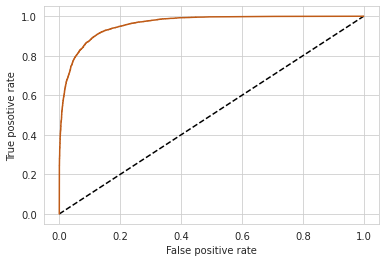

auc_score :  0.891530076106689


In [55]:
plt.plot([0,1],[0,1],'k--')
plt.plot(frp,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True posotive rate')
plt.show()
auc_score=roc_auc_score(y_test,mod_1.predict(x_test))
print('auc_score : ',auc_score)

Our Final model is mod_1 with acurracy of 89% with Auc_Score of 89%

# Saving the model

In [56]:
import joblib
joblib.dump(mod_1,'FinalModel.pk1')

['FinalModel.pk1']